In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("accident_data.csv")
data

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,10-08-2024,12:45:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,30,Wednesday,August,2024
143,15-09-2024,08:30:00,37.7749,-122.4194,Highway,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,35,Thursday,September,2024
144,20-10-2024,16:20:00,34.0522,-118.2437,Street,Clear,Dry,Clear,Collision,Minor,Other,Car,2,45,Wednesday,October,2024
145,25-11-2024,14:10:00,40.7128,-74.0060,Intersection,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,55,Thursday,November,2024


In [3]:
data.isnull().sum()

Date                    0
Time                    0
Latitude                0
Longitude               0
Location Description    0
Weather Conditions      0
Road Conditions         0
Visibility              0
Accident Type           0
Injury Severity         0
Contributing Factors    0
Vehicle Type            0
No of Vehichles         0
Vehicle Speed           0
Day of Week             0
Month                   0
Year                    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  147 non-null    object 
 1   Time                  147 non-null    object 
 2   Latitude              147 non-null    float64
 3   Longitude             147 non-null    float64
 4   Location Description  147 non-null    object 
 5   Weather Conditions    147 non-null    object 
 6   Road Conditions       147 non-null    object 
 7   Visibility            147 non-null    object 
 8   Accident Type         147 non-null    object 
 9   Injury Severity       147 non-null    object 
 10  Contributing Factors  147 non-null    object 
 11  Vehicle Type          147 non-null    object 
 12  No of Vehichles       147 non-null    int64  
 13  Vehicle Speed         147 non-null    int64  
 14  Day of Week           147 non-null    object 
 15  Month                 1

In [5]:
data.describe()

,Latitude,Longitude,No of Vehichles,Vehicle Speed,Year
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,38.325525,-98.649265,1.428571,38.843537,2022.979592
std,3.197276,20.962406,0.496564,8.110285,0.823203
min,34.052200,-122.419400,1.000000,25.000000,2022.000000
25%,34.052200,-118.243700,1.000000,30.000000,2022.000000
50%,40.712800,-87.629800,1.000000,35.000000,2023.000000
75%,40.712800,-74.006000,2.000000,45.000000,2024.000000
max,41.878100,-74.006000,2.000000,55.000000,2024.000000


In [6]:
data["DateTime"]=pd.to_datetime(data["Date"]+" "+data["Time"],format="%d-%m-%Y %H:%M:%S")

In [7]:
data.dtypes

Date                            object
Time                            object
Latitude                       float64
Longitude                      float64
Location Description            object
Weather Conditions              object
Road Conditions                 object
Visibility                      object
Accident Type                   object
Injury Severity                 object
Contributing Factors            object
Vehicle Type                    object
No of Vehichles                  int64
Vehicle Speed                    int64
Day of Week                     object
Month                           object
Year                             int64
DateTime                datetime64[ns]
dtype: object

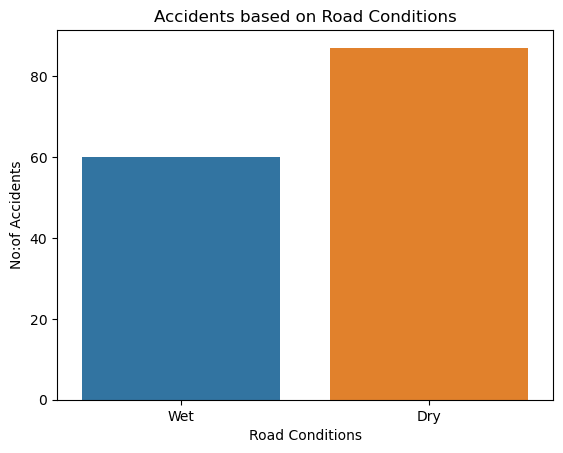

In [8]:
sns.countplot(x="Road Conditions",data=data)
plt.title("Accidents based on Road Conditions")
plt.xlabel("Road Conditions")
plt.ylabel("No:of Accidents")
plt.show()

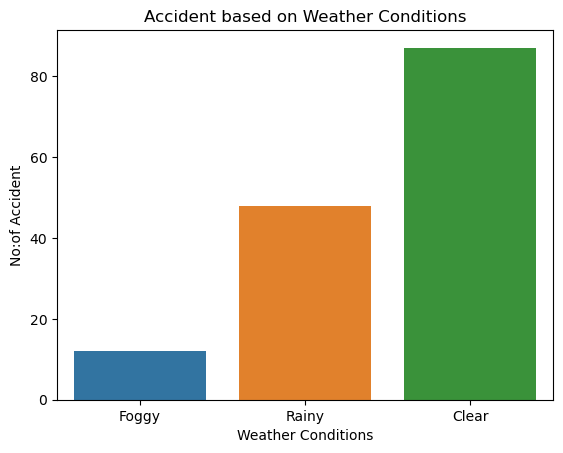

In [9]:
sns.countplot(x="Weather Conditions",data=data)
plt.title("Accident based on Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("No:of Accident")
plt.show()

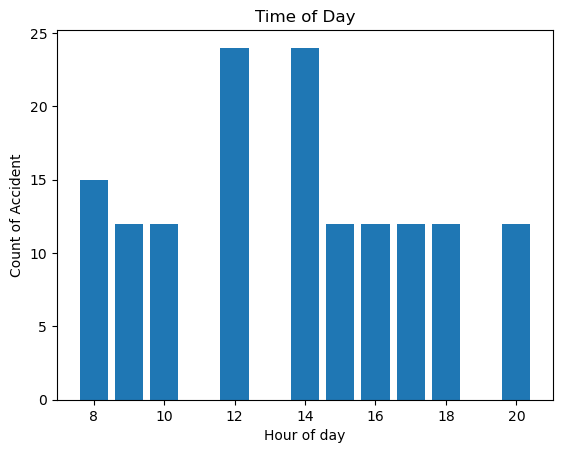

In [10]:
data["Time"]=pd.to_datetime(data["Time"])
data["Hour"]=data["Time"].dt.hour
time_of_day=data["Hour"].value_counts().sort_index()
plt.bar(time_of_day.index,time_of_day.values)
plt.xlabel("Hour of day")
plt.ylabel("Count of Accident")
plt.title("Time of Day")
plt.show()

C:\Users\SWATHY KRISHNA\AppData\Local\Temp\ipykernel_14284\1123030079.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"]=pd.to_datetime(data["Date"])


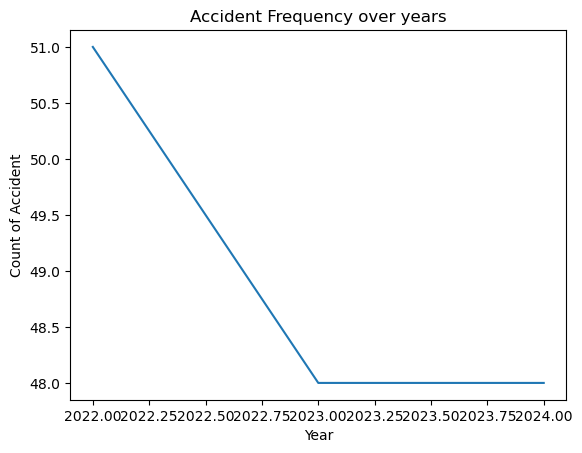

In [11]:
data["Date"]=pd.to_datetime(data["Date"])
data.groupby(data["Date"].dt.year)["Accident Type"].count().plot(kind="line")
plt.title("Accident Frequency over years")
plt.xlabel("Year")
plt.ylabel("Count of Accident")
plt.show()

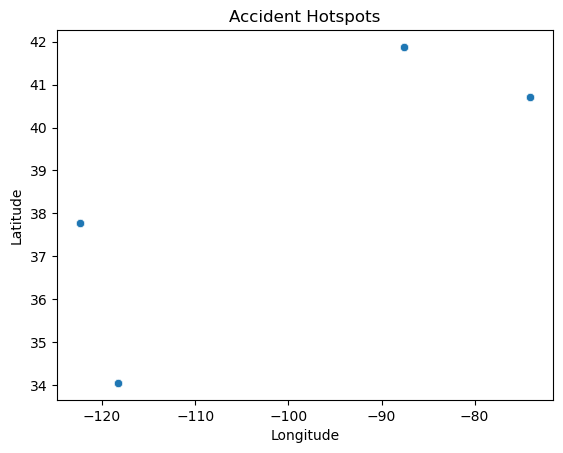

In [12]:
sns.scatterplot(x="Longitude",y="Latitude",data=data)
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()